In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Load Image

In [19]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

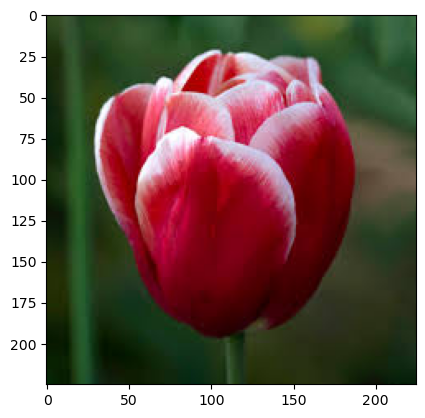

In [32]:
filename = 't.jpeg'
img = read_file(filename)

org_img = np.copy(img)

# Create Edge Masks

In [33]:
def edge_mask(img, line_size, blur_value):
    """
    Input: Input image
    Output: Edges of Image
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)

    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    return edges

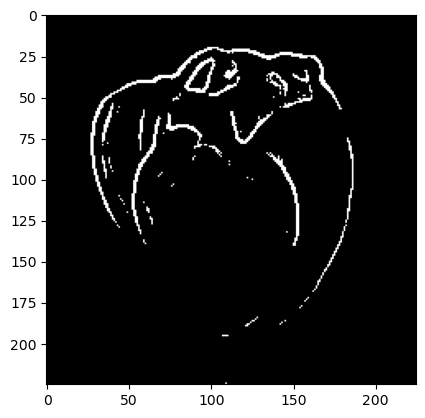

In [34]:
line_size, blur_value = 5,7
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap = 'binary')
plt.show()

# Reduce the Color Palette

In [35]:
def color_quantization(img, k):

    #Transform the image
    data = np.float32(img).reshape((-1,3))

    # Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    # Implementing K-Means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

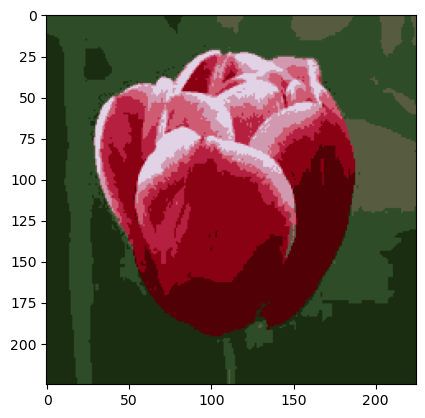

In [36]:
img = color_quantization(img, k= 9)

plt.imshow(img)
plt.show()

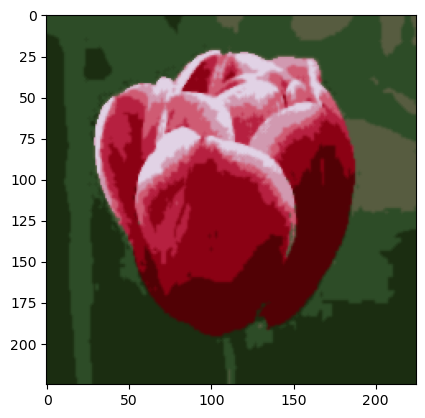

In [37]:
# Reduce the noise

blurred = cv2.bilateralFilter(img, d = 3, sigmaColor = 200, sigmaSpace = 200)

plt.imshow(blurred)
plt.show()

# Combine Edge Mask with the Quantiz image

In [38]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask = edges)

    plt.imshow(c)
    plt.title("Cartoonified Image")
    plt.show()

    plt.imshow(org_img)
    plt.title("Original Image")
    plt.show()

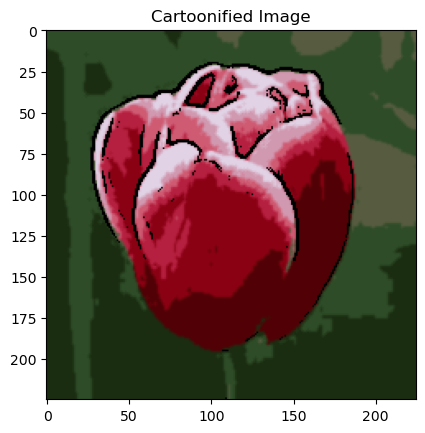

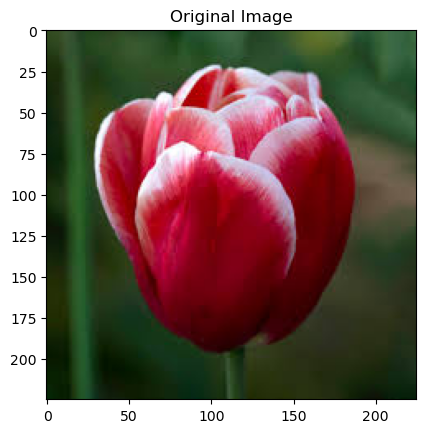

In [39]:
cartoon()